In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# What is Ensemble Learning?

<b>Ensemble Learning</b> works on the principle of aggregating the predictions of different models such as classifiers or regrresors for the final predictions. 

Ensemble Learning consists of methods like voting classifier, random forest, bagging and boosting. 

### Working of Ensemble Learning Methods

- Train different models on the same dataset.
- Let each model make its predictions.
- Meta-model: aggregates predicitons of individual models (Hence, the final prediction is more robust and less prone to errors.)

### Voting Classifier

Supose we have a couple of classifiers Logistic Regression, Decision Tree Classifier and KNeighborsClassifier with each having a decent accuracy of 80-85%. Now, a simple way of creating an even better classifier is to combine the predicitons of all classifiers and output the most frequent class. This type of classification is known as Hard Voting Classifier. 

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [7]:
from sklearn import datasets

In [8]:
data = datasets.load_breast_cancer()

In [10]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
target_df = pd.DataFrame(data.target, columns = ['tumor'])
target_df.head()

,tumor
0,0
1,0
2,0
3,0
4,0


In [16]:
df = pd.concat([df, target_df], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
X = df.drop(['tumor'],axis=1)
y = df['tumor']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [19]:
X_train.shape

(398, 30)

In [20]:
X_test.shape

(171, 30)

In [21]:
lr = LogisticRegression()
knn = KNN()
dt = DecisionTreeClassifier()

In [22]:
classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Classification Tree',dt)
]

In [23]:
for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print(f'{clf_name}: {accuracy_score(y_test, predictions)}')

Logistic Regression: 0.9707602339181286
K Nearest Neighbours: 0.9590643274853801
Classification Tree: 0.9415204678362573


C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Using Voting Classifier from sklearn

In [24]:
vc = VotingClassifier(estimators=classifiers)

In [25]:
vc.fit(X_train,y_train)
predictions = vc.predict(X_test)

C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(f'Voting Classifier: {accuracy_score(y_test, predictions)}')

Voting Classifier: 0.9824561403508771


We can see that the voting classifer gives a better accuracy than other individual models. 

# Bagging 

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

Difference between ensemble methods

#### Voting Classifier
- It uses the same training set
- Uses different machine learning algorithm

#### Bagging
- Uses a single algorithm
- Uses different subsets of the training set.

The Bagging Algorithm has three bases steps:
- <b>Bootstrapping: </b> Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training dataset by selecting data points at random and with replacement. This means that each time you select a data point from the training dataset, you are able to select the same instance multiple times. As a result, a value/instance repeated twice (or more) in a sample.

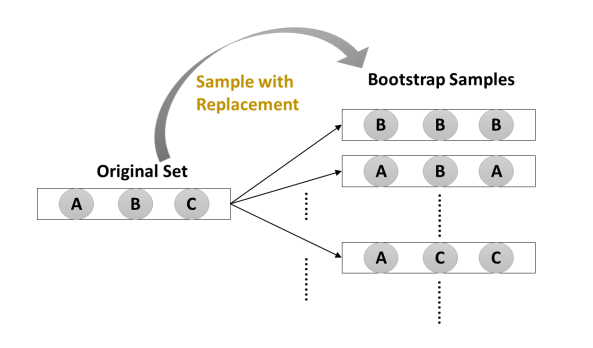


- <b> Parallel Training: </b> These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

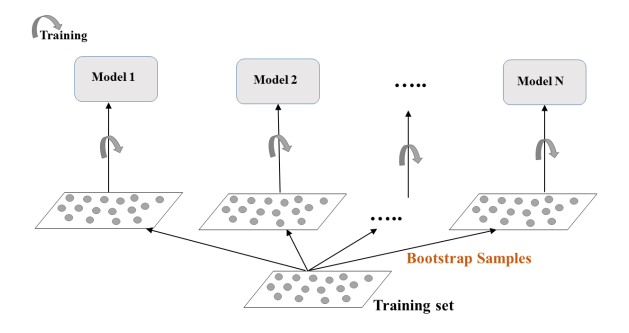

- <b>Aggregation: </b> Finally, depending on the task (i.e. regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

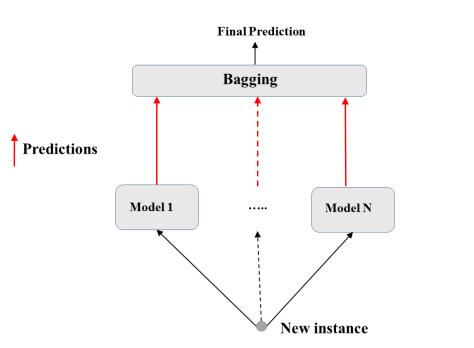

### Bagging Classifier  using Sklearn

In [29]:
from sklearn.ensemble import BaggingClassifier

Training Bagging Classifier on 250 different Decision Tree Classifier with 100 bootstrapped subsets of trainng data.

In [33]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=250,max_samples=100,bootstrap=True,
                       random_state=42,n_jobs=-1)
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=250, n_jobs=-1, random_state=42)

In [34]:
predictions = bc.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [35]:
print(f'Accuracy of Bagging Classifier: {accuracy_score(y_test,predictions)}')

Accuracy of Bagging Classifier: 0.9590643274853801


### Some problems with Bagging

- Whenever we use bagging, there is some amount of data that might besamples more than once, or perhaps even more and there might be some data is not sampled at all. 

- Bagging Classifier samples n training instances with replacement by default, which means only aroudn 63% of data is sampled on an average for each predictor. The rest of the 37% of the data are not sampled at all and these data/instances constitude the <b>Out-of-bag(OOB)</b> instances.

Since, our model while training is never introduced to these OOB instances, it can be useful for evaluating removing the need for seprate validaiton data. The Bagging Classifier has a parameter <b>oob_score</b> which upon setting true will automatically use oobs for evaluation after the training is done.

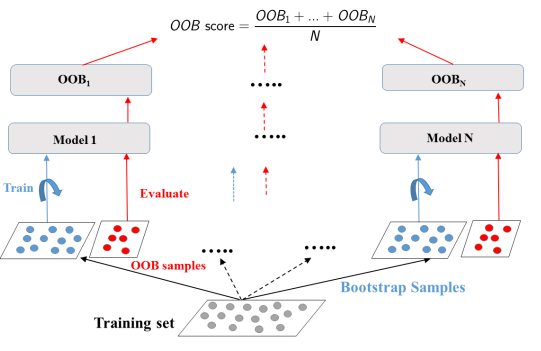

In [36]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=250,max_samples=100,bootstrap=True,
                       random_state=42,n_jobs=-1, oob_score=True)
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=250, n_jobs=-1, oob_score=True, random_state=42)

In [37]:
predictions = bc.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [38]:
print(f'Accuracy of Bagging Classifier with OOB: {accuracy_score(y_test,predictions)}')

Accuracy of Bagging Classifier with OOB: 0.9590643274853801


In [39]:
bc.oob_score

True

In [40]:
bc.oob_score_

0.9396984924623115

# Random Forest

Random Forest is one of the most popular bagging algorithms. It is just an ensemble of decision trees trained by the bagging method. So instead of creating a bagging classifier and using decidion trees as its estimator, it is better to straight away use RandomForest Classifier or Random Forest Regressor.

- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size of the training set
- RandomForest introduces further randomizaton in the training of individual trees
- d features are sampled at each node without replacement (d < total number of features)

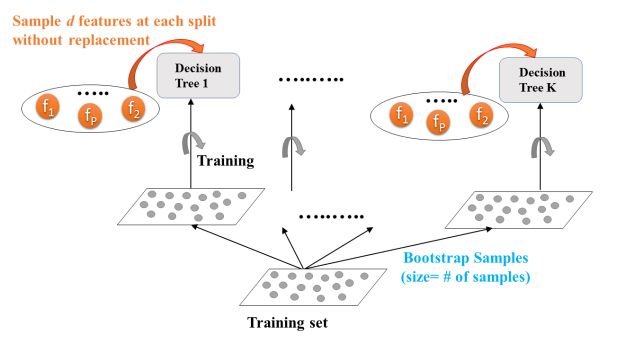

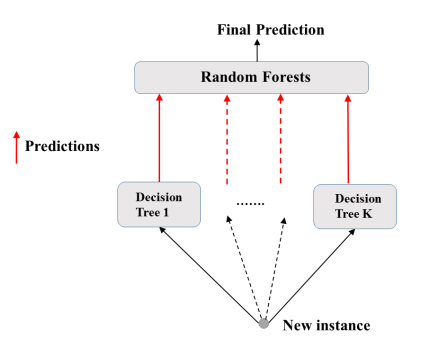

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random_forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,n_jobs=-1)
random_forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [43]:
predictions = random_forest_clf.predict(X_test)

In [44]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [46]:
print(f'Accuracy of Random Forest: {accuracy_score(y_test,predictions)}')

Accuracy of Random Forest: 0.9649122807017544


<b> Note: RamdomForestClassifier consits of all the hyperparameters of a Decision Tree Classifier as well as that of Bagging Classifier to control the process. </b>

### Feature Importance using RandomForest

Random Forests helps us to measure the importance of each and every feature. Scikit-learn calculates it by analyzing how much a tree node that uses that feature reduces impurity on average

In [48]:
random_forest_clf.feature_importances_

array([0.03689049, 0.01315188, 0.04140606, 0.03970029, 0.00632164,
       0.01034387, 0.06110798, 0.12675283, 0.00339584, 0.00450005,
       0.01802678, 0.00328202, 0.00927173, 0.03803526, 0.00478229,
       0.00500914, 0.00669838, 0.00511993, 0.00419634, 0.00524276,
       0.07559337, 0.01882837, 0.10790316, 0.11806553, 0.00931048,
       0.01741262, 0.04210314, 0.14891868, 0.01360618, 0.00502289])

In [49]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [50]:
importances_rf = pd.Series(random_forest_clf.feature_importances_,index=X.columns)
importances_rf

mean radius                0.036890
mean texture               0.013152
mean perimeter             0.041406
mean area                  0.039700
mean smoothness            0.006322
mean compactness           0.010344
mean concavity             0.061108
mean concave points        0.126753
mean symmetry              0.003396
mean fractal dimension     0.004500
radius error               0.018027
texture error              0.003282
perimeter error            0.009272
area error                 0.038035
smoothness error           0.004782
compactness error          0.005009
concavity error            0.006698
concave points error       0.005120
symmetry error             0.004196
fractal dimension error    0.005243
worst radius               0.075593
worst texture              0.018828
worst perimeter            0.107903
worst area                 0.118066
worst smoothness           0.009310
worst compactness          0.017413
worst concavity            0.042103
worst concave points       0

In [66]:
sorted_features = importances_rf.sort_values()
sorted_features

texture error              0.003282
mean symmetry              0.003396
symmetry error             0.004196
mean fractal dimension     0.004500
smoothness error           0.004782
compactness error          0.005009
worst fractal dimension    0.005023
concave points error       0.005120
fractal dimension error    0.005243
mean smoothness            0.006322
concavity error            0.006698
perimeter error            0.009272
worst smoothness           0.009310
mean compactness           0.010344
mean texture               0.013152
worst symmetry             0.013606
worst compactness          0.017413
radius error               0.018027
worst texture              0.018828
mean radius                0.036890
area error                 0.038035
mean area                  0.039700
mean perimeter             0.041406
worst concavity            0.042103
mean concavity             0.061108
worst radius               0.075593
worst perimeter            0.107903
worst area                 0

In [67]:
import matplotlib.pyplot as plt

<AxesSubplot:>

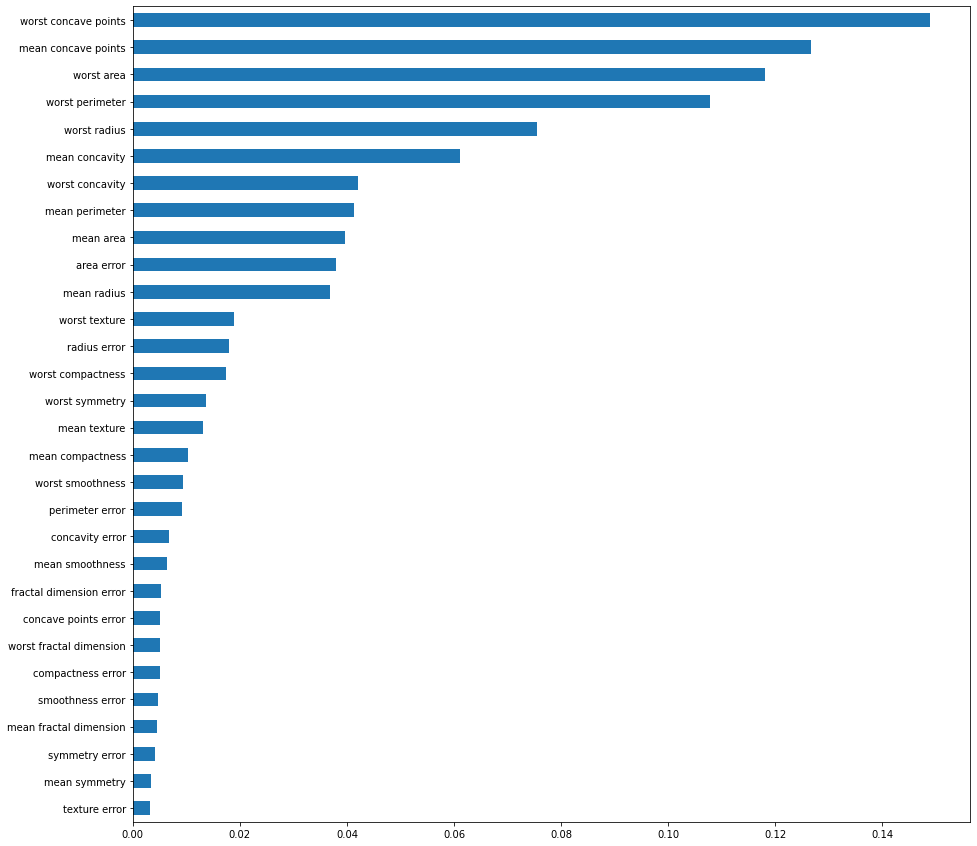

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
sorted_features.plot(kind='barh')